In [1]:
# 0 = No
# 1 = Yes

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

In [3]:
data = pd.read_csv('PCOS_Final_Data.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              541 non-null    int64  
 1   Sl. No                  541 non-null    int64  
 2   Patient File No.        541 non-null    int64  
 3   PCOS (Y/N)              541 non-null    int64  
 4    Age (yrs)              541 non-null    int64  
 5   Weight (Kg)             541 non-null    float64
 6   Height(Cm)              541 non-null    float64
 7   BMI                     541 non-null    float64
 8   Blood Group             541 non-null    int64  
 9   Pulse rate(bpm)         541 non-null    int64  
 10  RR (breaths/min)        541 non-null    int64  
 11  Hb(g/dl)                541 non-null    float64
 12  Cycle(R/I)              541 non-null    int64  
 13  Cycle length(days)      541 non-null    int64  
 14  Marraige Status (Yrs)   541 non-null    fl

In [5]:
#There is a column without name,So, first naming it.
data = data.rename(columns={'Unnamed: 0': 'index'})

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   541 non-null    int64  
 1   Sl. No                  541 non-null    int64  
 2   Patient File No.        541 non-null    int64  
 3   PCOS (Y/N)              541 non-null    int64  
 4    Age (yrs)              541 non-null    int64  
 5   Weight (Kg)             541 non-null    float64
 6   Height(Cm)              541 non-null    float64
 7   BMI                     541 non-null    float64
 8   Blood Group             541 non-null    int64  
 9   Pulse rate(bpm)         541 non-null    int64  
 10  RR (breaths/min)        541 non-null    int64  
 11  Hb(g/dl)                541 non-null    float64
 12  Cycle(R/I)              541 non-null    int64  
 13  Cycle length(days)      541 non-null    int64  
 14  Marraige Status (Yrs)   541 non-null    fl

In [7]:
#Droping the columns which are not related to the output
data = data.drop(['index','Sl. No','Patient File No.'],axis=1)

In [8]:
data.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL)
0,0,28,44.6,152.0,19.300000,15,78,22,10.48,2,...,0,110,80,3,3,18.0,18.0,8.5,1.99,1.99
1,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,...,0,120,70,3,5,15.0,14.0,3.7,60.80,1.99
2,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,...,0,120,80,13,15,18.0,20.0,10.0,494.08,494.08
3,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,...,0,120,70,2,2,15.0,14.0,7.5,1.99,1.99
4,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,...,0,120,80,3,4,16.0,14.0,7.0,801.45,801.45


# data Visualisation and analysis

<AxesSubplot:>

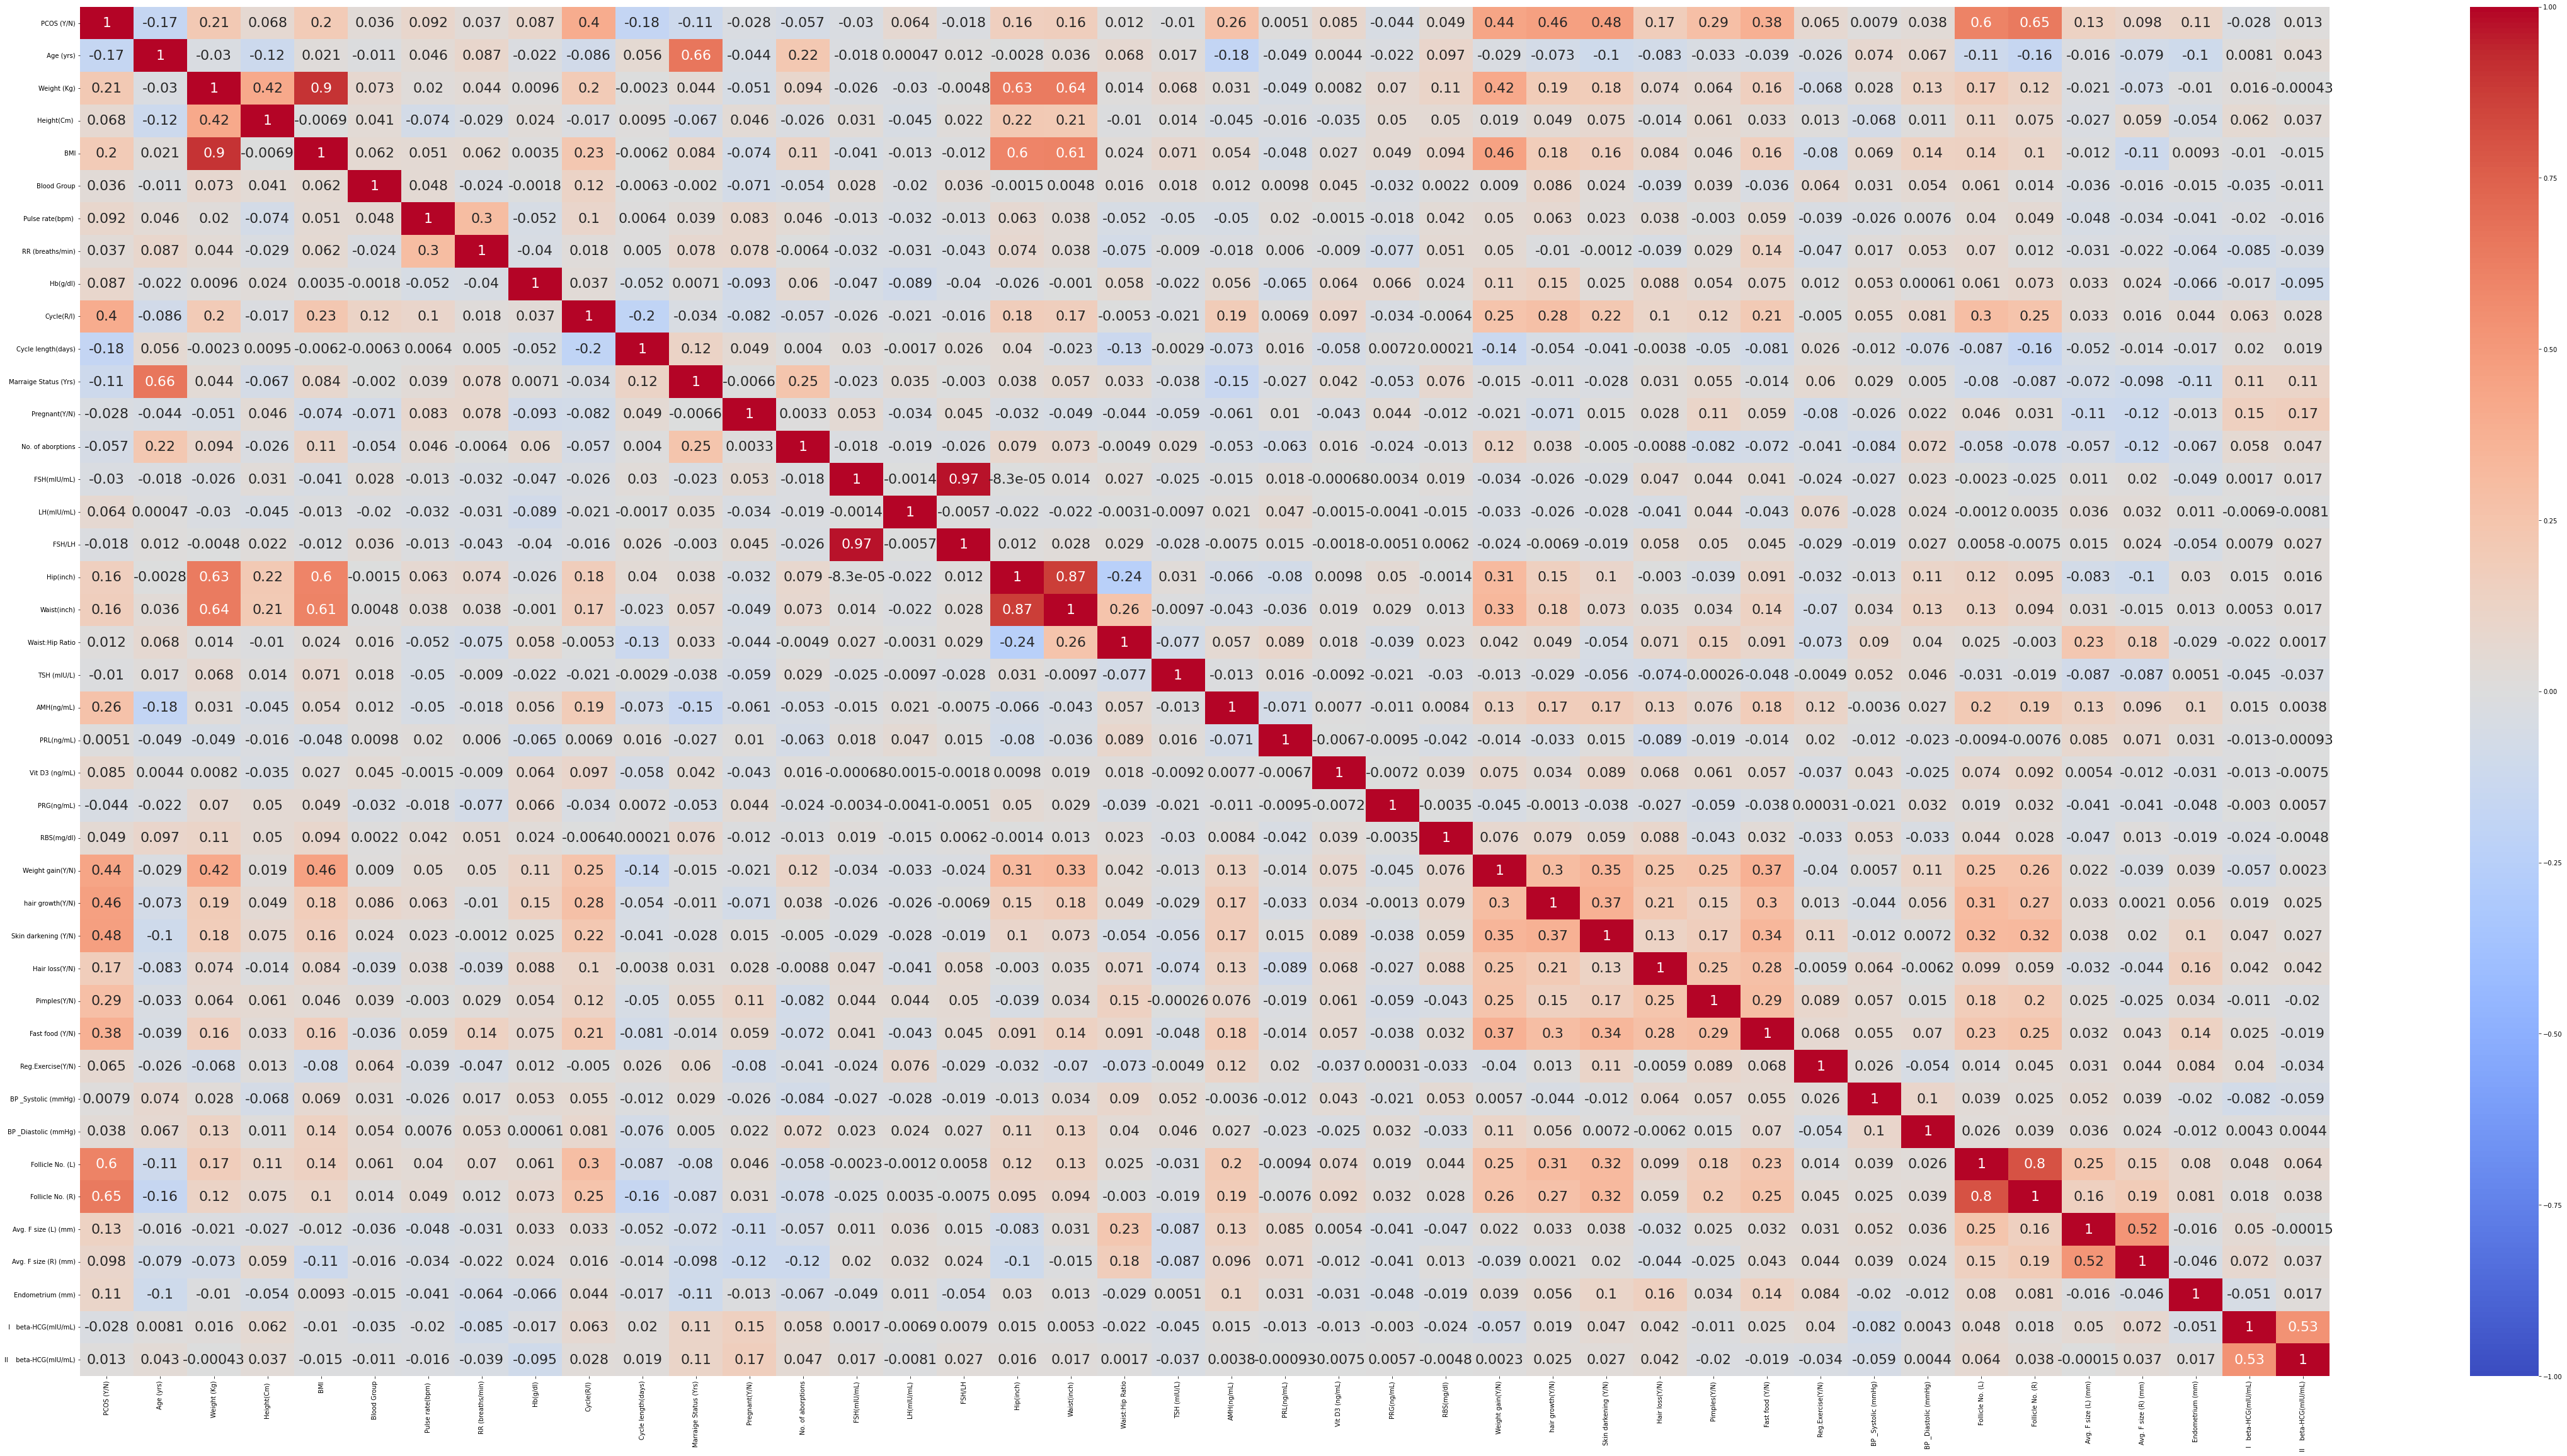

In [10]:
plt.figure(figsize=(5, 10))
target_correlation = data.corr()[['PCOS (Y/N)']]
sb.heatmap(target_correlation, annot=True, cmap='coolwarm',vmin=-1,vmax=1)
plt.show()